In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
print("Basic Information:")
print(credit_card_data.info())
print("\nFirst five rows of the dataset:")
print(credit_card_data.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa

In [4]:
print("\nChecking for missing values:")
print(credit_card_data.isnull().sum())


Checking for missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Section 3: Distribution of Classes
print("\nDistribution of legit and fraudulent transactions:")
print(credit_card_data['Class'].value_counts())


Distribution of legit and fraudulent transactions:
0    284315
1       492
Name: Class, dtype: int64


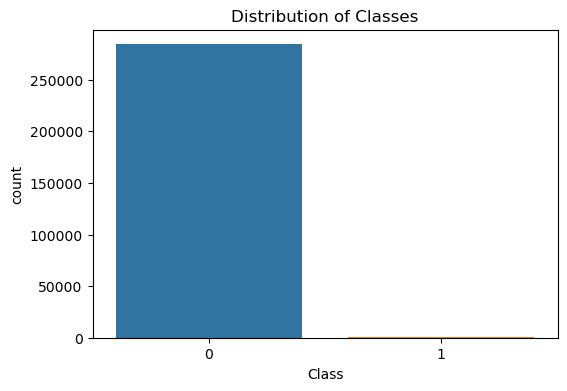

In [6]:
# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=credit_card_data)
plt.title('Distribution of Classes')
plt.show()

In [7]:
print("\nStatistical Summary:")
print(credit_card_data.describe())


Statistical Summary:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00 

Text(0.5, 1.0, 'Distribution of Transaction Amounts')

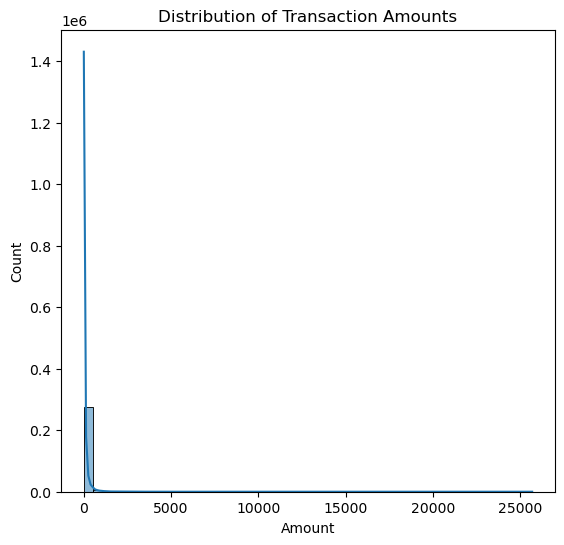

In [8]:
# Section 5: Distribution of Amounts
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(credit_card_data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')

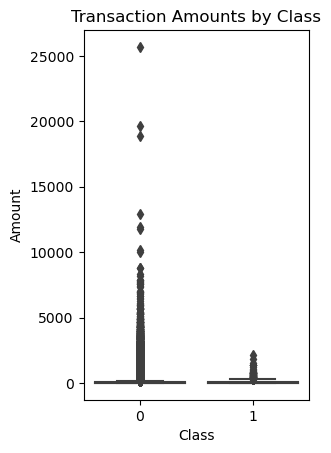

In [9]:
plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', data=credit_card_data)
plt.title('Transaction Amounts by Class')
plt.show()

Text(0.5, 1.0, 'Distribution of Transaction Time')

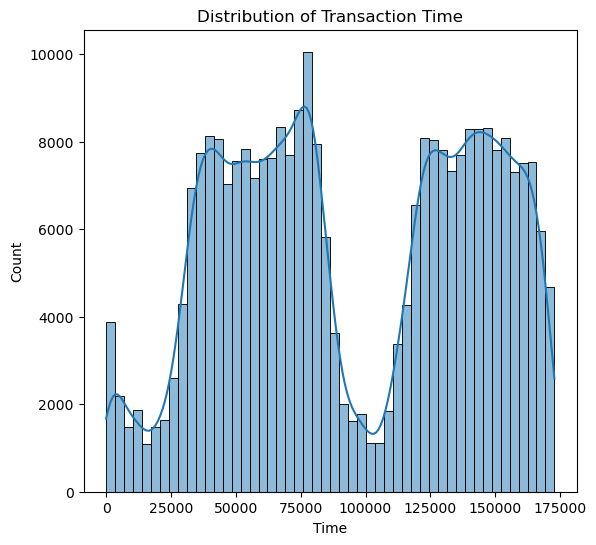

In [10]:
# Section 6: Distribution of Time
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(credit_card_data['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')

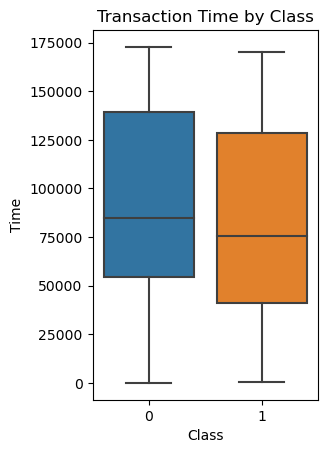

In [11]:
plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Time', data=credit_card_data)
plt.title('Transaction Time by Class')
plt.show()

In [12]:
# Section 7: Correlation Matrix
correlation_matrix = credit_card_data.corr()

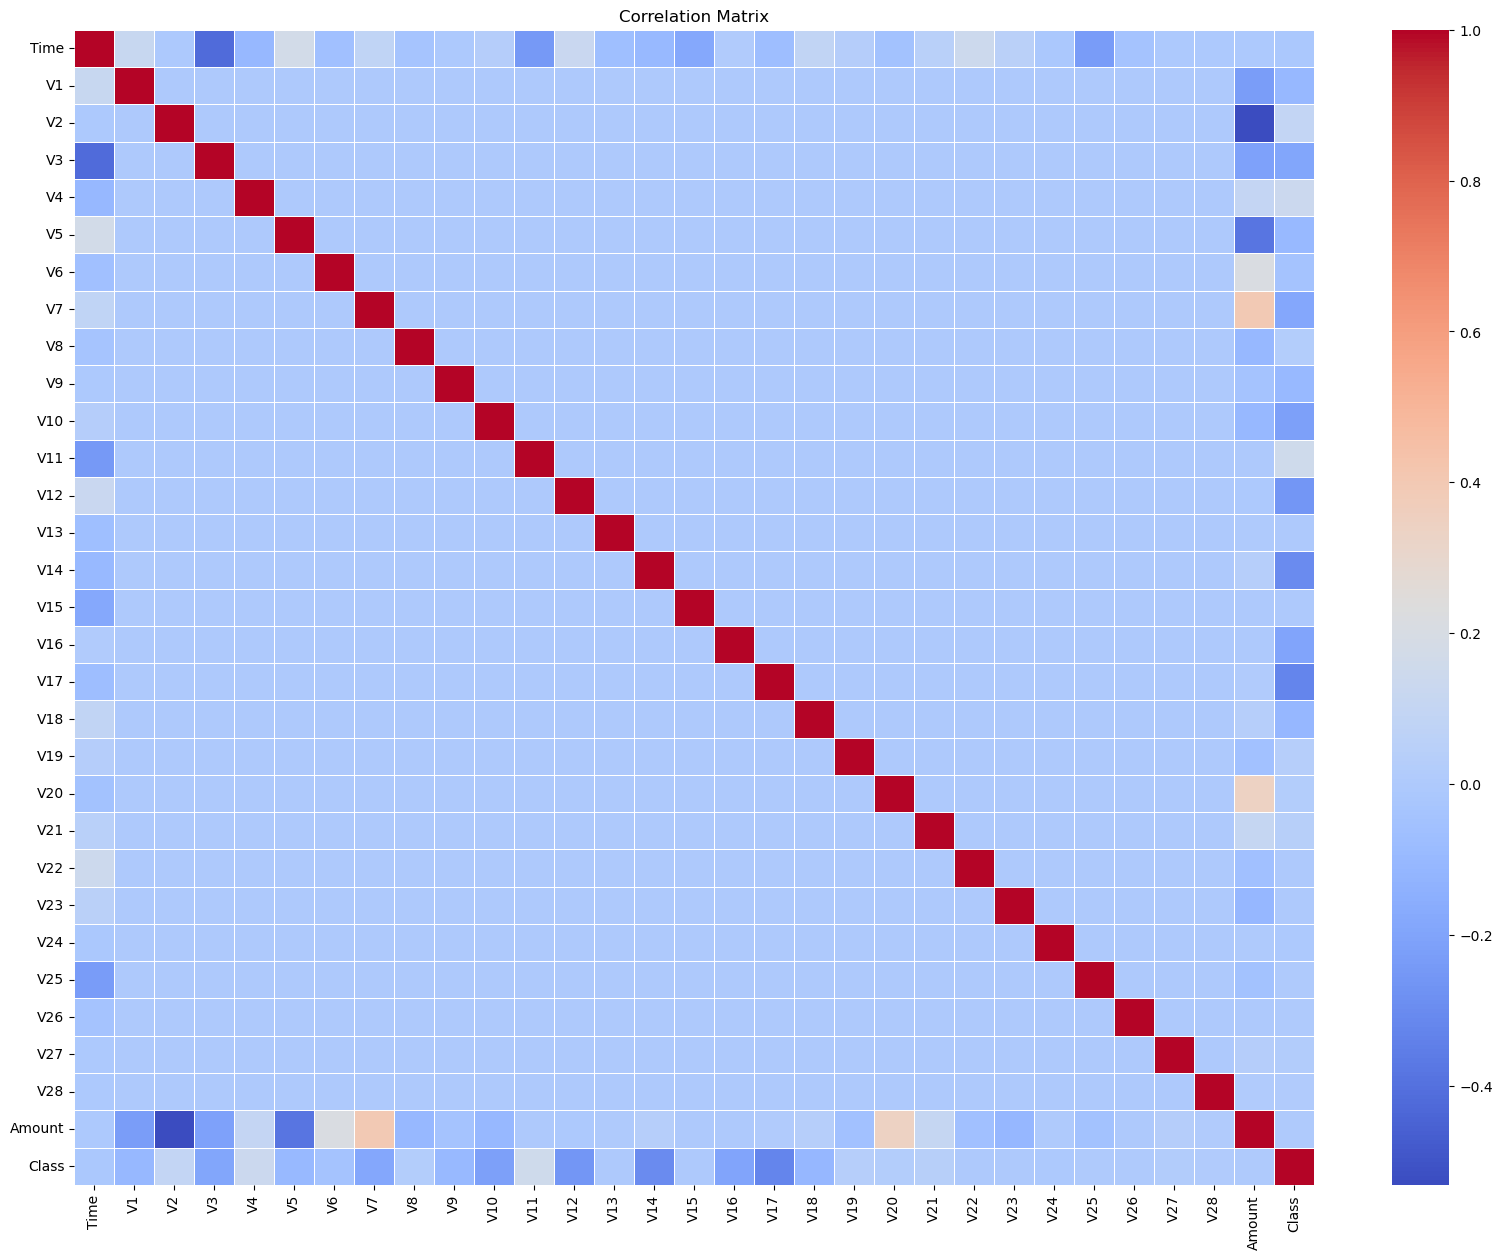

In [13]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Section 8: Correlation with Class
correlation_with_class = correlation_matrix['Class'].sort_values(ascending=False)
print("\nCorrelation with Class:")
print(correlation_with_class)


Correlation with Class:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [15]:
# Section 9: Highly Correlated Features
high_corr_features = correlation_with_class[abs(correlation_with_class) > 0.5].index
print("\nHighly Correlated Features with Class:")
print(high_corr_features)


Highly Correlated Features with Class:
Index(['Class'], dtype='object')


In [16]:
# Section 10: Model Building

# Separate the data into legit and fraudulent transactions
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print("Legit transactions shape:", legit.shape)
print("Fraudulent transactions shape:", fraud.shape)

Legit transactions shape: (284315, 31)
Fraudulent transactions shape: (492, 31)


In [17]:
# Balance the dataset by undersampling the legit transactions
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)
print("New dataset class distribution:\n", new_dataset['Class'].value_counts())

New dataset class distribution:
 0    492
1    492
Name: Class, dtype: int64


In [18]:
# Group by class and calculate the mean for the new dataset
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93016.477642,-0.026291,0.085056,0.042308,-0.035798,-0.134338,0.008937,-0.051178,0.028741,0.108189,...,0.012648,-0.026280,0.045522,0.001179,0.007744,0.029354,-0.002245,0.014058,-0.000190,86.579472
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
# Separate the features and the target variable
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print("Full dataset shape:", X.shape)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Full dataset shape: (984, 30)
Training set shape: (787, 30)
Testing set shape: (197, 30)


In [21]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [22]:
# Evaluate the model
training_accuracy = model.score(X_train, Y_train)
testing_accuracy = model.score(X_test, Y_test)

print("Training accuracy:", training_accuracy)
print("Testing accuracy:", testing_accuracy)

Training accuracy: 0.9428208386277002
Testing accuracy: 0.9441624365482234


In [23]:
# Detailed classification report
Y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95        99
           1       0.99      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



Testing Accuracy: 0.9441624365482234
Confusion Matrix:
[[98  1]
 [10 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        99
           1       0.99      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



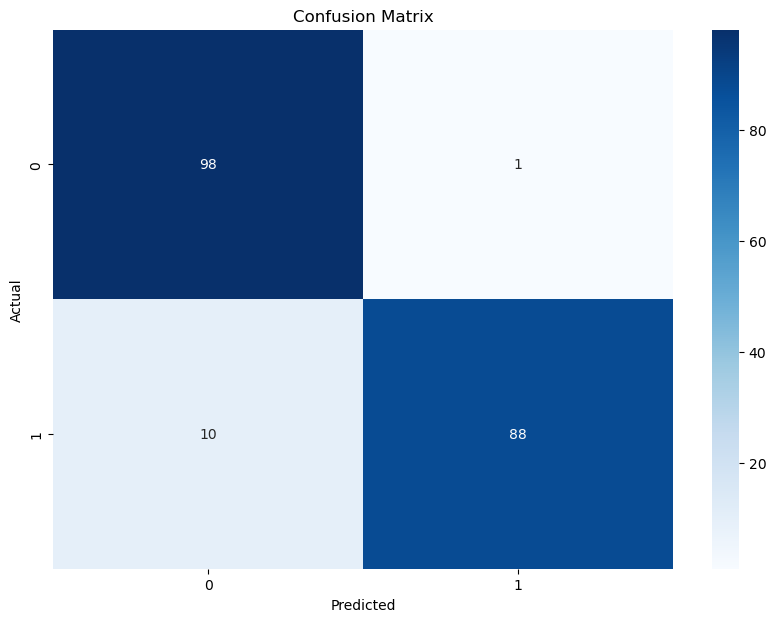

In [24]:
# Section 13: Testing the Trained Model
# Predicting on Test Data
Y_test_pred = model.predict(X_test)

# Compute Evaluation Metrics
test_accuracy = accuracy_score(Y_test, Y_test_pred)
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
class_report = classification_report(Y_test, Y_test_pred)

# Print and Interpret the Results
print(f"Testing Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()